In [1]:
# Importing The libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,root_mean_squared_error

In [2]:
df=pd.read_excel('cleaned.xlsx')

In [3]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,1.720979,98.907149,0,0,1
1,2013,4.75,2.255493,116.919996,1,0,1
2,2017,7.25,2.287471,60.252218,0,0,1
3,2011,2.85,1.423108,54.300312,0,0,1
4,2014,4.60,1.927164,116.381220,1,0,1
...,...,...,...,...,...,...,...
291,2016,9.50,2.451005,107.449775,1,0,1
292,2015,4.00,1.774952,131.742217,0,0,1
293,2009,3.35,2.397895,151.021928,0,0,1
294,2017,11.50,2.525729,66.406442,1,0,1


In [4]:
sc=StandardScaler()
df['Present_Price']=sc.fit_transform(df[['Present_Price']])
df['Kms_Driven']=sc.fit_transform(df[['Kms_Driven']])

- Here scaling is not compulsory in the elstic regression because if we do scaling also the values wont change

In [6]:
X=df.drop(columns='Selling_Price')
y=df['Selling_Price']

- Spliiting the X and y

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=94)

- Splitting the data into train data and test data

In [10]:
model=PCA(n_components=0.95)
X_train=model.fit_transform(X_train)
X_test=model.transform(X_test)

- using pca i want 95 % contribution to predict the dependent variable  if the data

In [12]:
model.explained_variance_ratio_

array([0.79523121, 0.14016217, 0.04053705])

In [71]:
#modeling
eln=ElasticNet(alpha=1,l1_ratio=1)
eln.fit(X_train,y_train)

ElasticNet(alpha=1, l1_ratio=1)

- Model is fitted with the parameters alpha=1 and l1_ratio=1

In [69]:
print('Coefficients of the model:',eln.coef_)
print('Intercept of the model:',eln.intercept_)

Coefficients of the model: [-0.23120316 -2.29603665 -0.        ]
Intercept of the model: 4.524703389830486


**Train Metrics Evalution**

In [76]:
cross=cross_val_score(eln,X_train,y_train,cv=5,scoring='r2').mean()
train_mse=mean_squared_error(y_train,eln.predict(X_train))
train_rmse=root_mean_squared_error(y_train,eln.predict(X_train))
train_r2=r2_score(y_train,eln.predict(X_train))
print('train_mse:',train_mse)
print('train rmse :',round(train_rmse))
print("Train_r2",train_r2)
print('Cross validation score is:',cross)

train_mse: 11.51043056049736
train rmse : 3
Train_r2 0.5348565160733416
Cross validation score is: 0.5515730000523877


- Here train mse is 11
- train rmse is 3
- train accuracy is 53%
- And cross validation score is 55%

**Prediction**

In [111]:
y_test_pred=model.predict(X_test)

**Evaluation metrics**

In [114]:
test_mse=mean_squared_error(y_test,y_test_pred)
test_rmse=root_mean_squared_error(y_test,y_test_pred)
test_r2=r2_score(y_test,y_test_pred)
print('test_mse:',test_mse)
print('test rmse :',test_rmse)
print('test_r2:',test_r2)

test_mse: 12.359948323955377
test rmse : 3.515671816873039
test_r2: 0.5038509005260399


- Here the test error of mse is 12.3
- test rmse is 3.5
- test accuracy is 50%

**plotting the residuals**

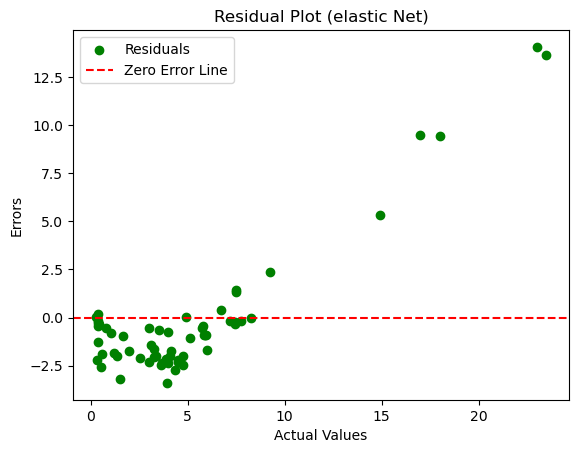

In [103]:

plt.scatter(y_test, residuals, color='g', label='Residuals')
plt.axhline(0, color='r', linestyle='--', label='Zero Error Line')
plt.xlabel('Actual Values')
plt.ylabel('Errors')
plt.legend()
plt.title('Residual Plot (elastic Net)')
plt.show()

- Here also it is predicting well with low error for low values
- but for high values it predicting with high error

**Plotting the best fit line**

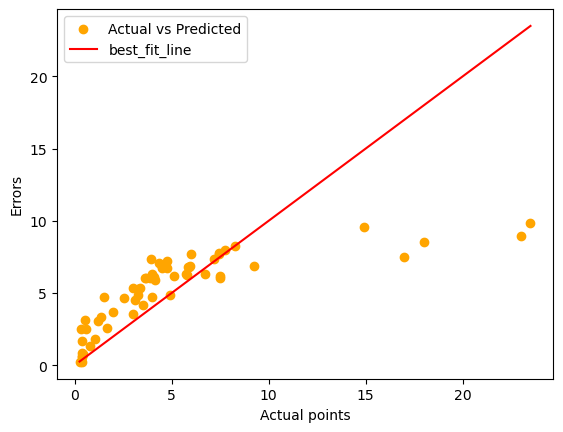

In [108]:
plt.scatter(y_test,y_test_pred,color='orange',label='actual vs Predicted')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',label='best_fit_line')
plt.xlabel('Actual points')
plt.ylabel('Errors')
plt.legend()
plt.show()

**HyperParameterTuning**

In [17]:
estimator=ElasticNet()
param_grid={'alpha':list(range(1,100)),
           'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gd=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
gd.fit(X_train,y_train)
gd.best_params_

{'alpha': 1, 'l1_ratio': 1}